In [1]:
import pandas as pd

In [5]:
df = pd.read_pickle("updated_trump_speech_transcripts.pkl")

In [6]:
df.shape

(112, 6)

In [ ]:
df.head()

,Sr No,Source,Link,Date,Duration,transcript
0,1,rev,https://www.rev.com/blog/transcripts/donald-tr...,2016-10-09,from Trump declaring his candidacy in 2016 thr...,Martha Raddatz: (00:07)Good evening. I’m Marth...
1,2,rev,https://www.rev.com/blog/transcripts/donald-tr...,2016-09-26,from Trump declaring his candidacy in 2016 thr...,"Lester Holt: (00:07)Good evening, from Hofstra..."
2,3,youtube,https://www.youtube.com/watch?v=gFeq6zEu26k,2016-11-09,from Trump declaring his candidacy in 2016 thr...,"Thank you. Thank you very much, everybody. So..."
3,4,youtube,https://www.youtube.com/watch?v=5qYf7uRGruY,2016-08-17,from Trump declaring his candidacy in 2016 thr...,"Thank you, everybody. Thank you. What a group..."
4,5,youtube,https://www.youtube.com/watch?v=NnRVAzFa6Og,2016-10-21,from Trump declaring his candidacy in 2016 thr...,"Thank you, Al. Wow. That was good. This is a ..."


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text = df["transcript"][0]
len(text)

32767

In [ ]:
text = text.lower()
# removing the time stamps in our transcript

text = re.sub(r'\(\d{2}:\d{2}\)', '', text)

# removing stop words here !
text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
len(text)

# removing words that has less than 2 characters
text = ' '.join([word for word in text.split() if len(word) > 2])
len(text)

# 3. Lemmatize the words
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
text = ' '.join([word for word in text.split() if len(word) > 2])
len(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


21363

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(text)

# Print the top words for the df data
print("Top words for df data:")
for word, freq in wordcloud.words_.items():
    print(f"{word}: {freq}")

Top words for df data:
s: 1.0
donald trump: 0.6712328767123288
hillary clinton: 0.5068493150684932
people: 0.4657534246575342
want: 0.4383561643835616
ve: 0.3835616438356164
anderson cooper: 0.3835616438356164
question: 0.3698630136986301
country: 0.3424657534246575
said: 0.3424657534246575
one: 0.2876712328767123
thing: 0.2876712328767123
re going: 0.273972602739726
t: 0.2465753424657534
say: 0.2328767123287671
email: 0.2328767123287671
martha raddatz: 0.2328767123287671
think: 0.2191780821917808
look: 0.2054794520547945
re: 0.1917808219178082
great: 0.1917808219178082
m: 0.1780821917808219
number: 0.1780821917808219
going: 0.1643835616438356
campaign: 0.1643835616438356
back: 0.1643835616438356
women: 0.1643835616438356
secretary clinton: 0.1643835616438356
didn t: 0.1643835616438356
time: 0.1506849315068493
way: 0.1506849315068493
know: 0.1506849315068493
talk: 0.1506849315068493
never: 0.1506849315068493
let: 0.1506849315068493
seen: 0.136986301369863
much: 0.136986301369863
respon

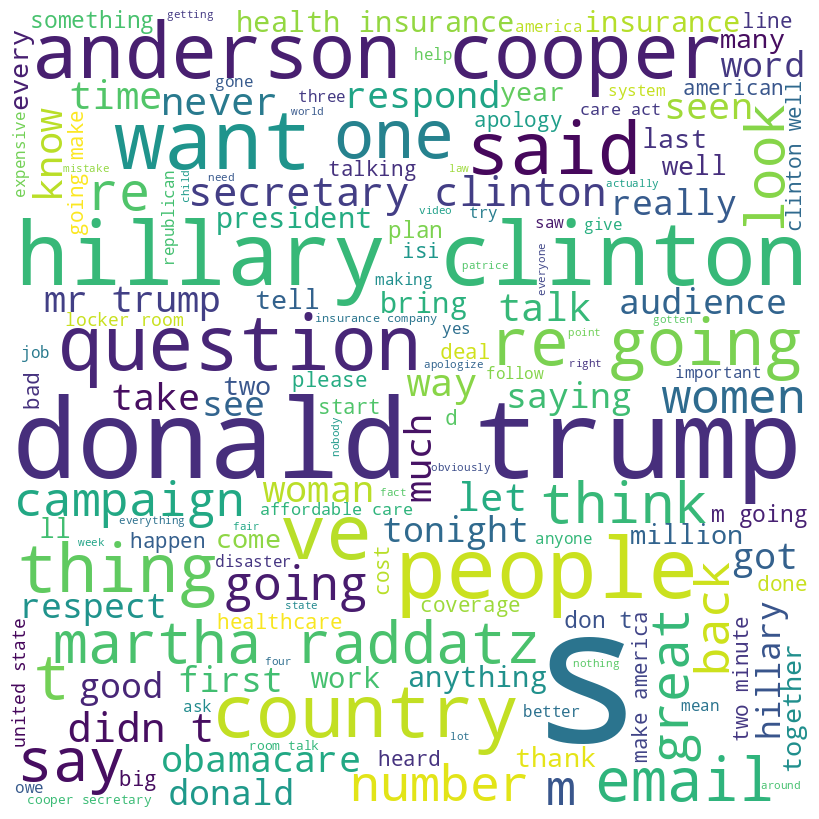

In [ ]:
# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

In [ ]:
import numpy as np
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords

# Define stop words
stopwords_list = list(stopwords.words('english'))

html = ""

for num_words in range(1, 4):

    # Set up the necessary transformers and the classifier
    vectoriser = CountVectorizer(lowercase=True, stop_words=stopwords_list, min_df=5, max_features=1000,
                                 token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b', ngram_range=(num_words,num_words))
    transformer = TfidfTransformer()

    # Fit the vectorizer
    X = vectoriser.fit_transform(df["transcript"])
    sums = X.sum(axis=0)

    html += (f"<h2>Top {num_words}-word phrases</h2>\n")
    html += "<table><tr><td>Rank</td><td>Word(s)</td><td>Count</td></tr>"

    # Display top terms based on their frequency
    top_term_indices = np.argsort(-sums).tolist()[0][:25]
    for ctr, idx in enumerate(top_term_indices):
        term = list(vectoriser.vocabulary_.keys())[list(vectoriser.vocabulary_.values()).index(idx)]
        html += (f"<tr><td>{ctr+1}</td><td>{term}</td><td>{sums[0,idx]}</td><tr>")

    html += "</tr></table>"

display(HTML(html))

Rank,Word(s),Count
1,people,2847
2,going,2785
3,trump,2445
4,know,2023
5,said,1871
6,great,1810
7,country,1795
8,donald,1721
9,want,1571
10,like,1480


### **Pre Processing and Analysis**

In [ ]:
def pre_process_text(text):
    text = text.lower()
    # removing the time stamps in our transcript

    text = re.sub(r'\(\d{2}:\d{2}\)', '', text)

    # removing stop words here !
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    len(text)

    # removing words that has less than 2 characters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    len(text)

    # 3. Lemmatize the words
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text


In [ ]:
def perform_analysis(transcript):
    """This function performs the following analysis on the transcript:

        i. Word count (top words; two and three word phrases)
        ii. Word cloud
        iii. Entity identification and sentiment analysis
        iv. Topic identification and sentiment analysis
        v. Sentiment analysis for sentences
    """
    # Pre-process the text
    text = pre_process_text(transcript)
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(text)

    # Print the top words for the df data
    # print("Top words for df data:")
    # for word, freq in wordcloud.words_.items():
    #     print(f"{word}: {freq}")
    # Display the word cloud using matplotlib


    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Show the plot
    plt.show()

    import numpy as np
    from IPython.display import display, HTML
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import make_pipeline
    from nltk.corpus import stopwords

    # Define stop words
    stopwords_list = list(stopwords.words('english'))

    html = ""

    for num_words in range(1, 4):

        # Set up the necessary transformers and the classifier
        vectoriser = CountVectorizer(lowercase=True, stop_words=stopwords_list, min_df=5, max_features=1000,
                                    token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b', ngram_range=(num_words,num_words))
        transformer = TfidfTransformer()

        # Fit the vectorizer
        X = vectoriser.fit_transform(df["transcript"])
        sums = X.sum(axis=0)

        html += (f"<h2>Top {num_words}-word phrases</h2>\n")
        html += "<table><tr><td>Rank</td><td>Word(s)</td><td>Count</td></tr>"

        # Display top terms based on their frequency
        top_term_indices = np.argsort(-sums).tolist()[0][:25]
        for ctr, idx in enumerate(top_term_indices):
            term = list(vectoriser.vocabulary_.keys())[list(vectoriser.vocabulary_.values()).index(idx)]
            html += (f"<tr><td>{ctr+1}</td><td>{term}</td><td>{sums[0,idx]}</td><tr>")

        html += "</tr></table>"

    display(HTML(html))


    return


### **Choose a transcript to Analyse**

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


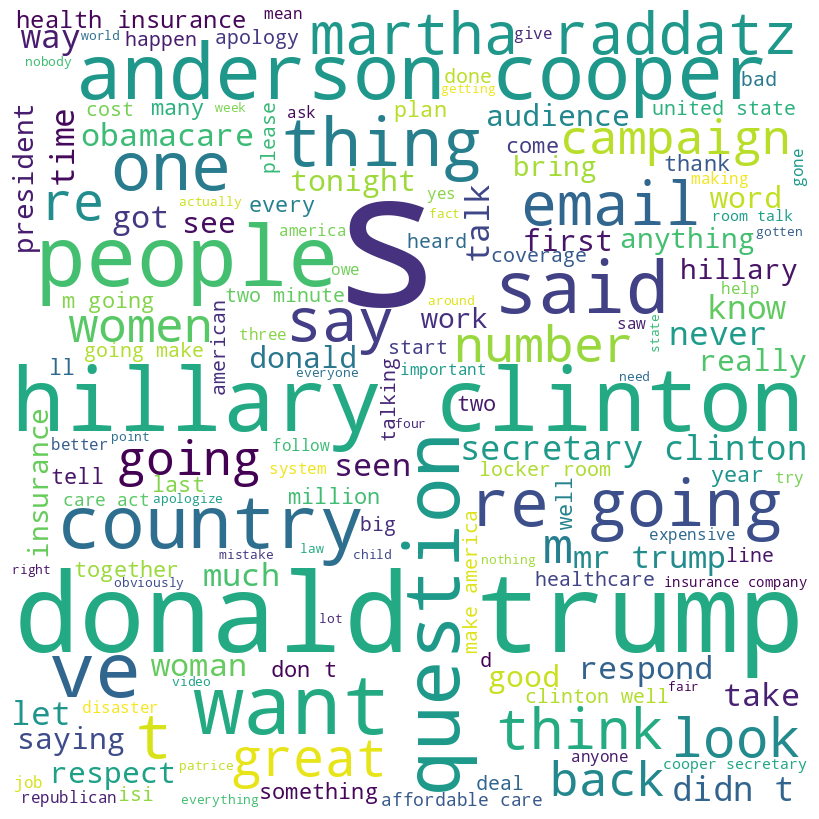

Rank,Word(s),Count
1,people,2847
2,going,2785
3,trump,2445
4,know,2023
5,said,1871
6,great,1810
7,country,1795
8,donald,1721
9,want,1571
10,like,1480


In [ ]:
perform_analysis(df["transcript"][0])

In [ ]:
# import streamlit as st

In [ ]:
# word_img = wordcloud.to_image()

In [ ]:
# st.html(html, width=800, height=800)
# st.image(word_img, width=800)

### **Loading the model for sentiment analysis**

In [ ]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sentiment_task("I am glad that he won the election")

[{'label': 'POSITIVE', 'score': 0.9993755221366882}]

In [ ]:
transcript = df["transcript"][0]

## **Transcript Level Sentiments Analysis with Word Cloud**

### Aggregating positive sentences and negative sentences separately

In [ ]:
positive = ""
negative = ""

for sentence in transcript.split("."):

    # print(sentence)
    label = sentiment_task(sentence)[0]["label"]
    if label == "POSITIVE":
        positive += sentence + "."
    elif label == "NEGATIVE":
        negative += sentence + "."

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


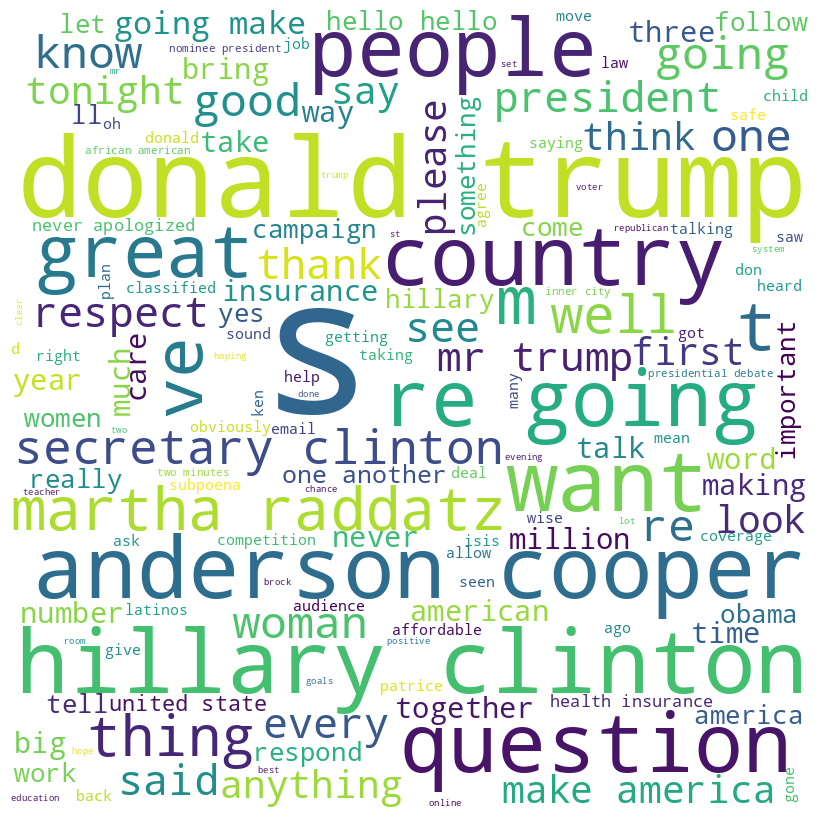

Rank,Word(s),Count
1,people,2847
2,going,2785
3,trump,2445
4,know,2023
5,said,1871
6,great,1810
7,country,1795
8,donald,1721
9,want,1571
10,like,1480


In [ ]:
## word cloud for positive sentiment
perform_analysis(positive)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


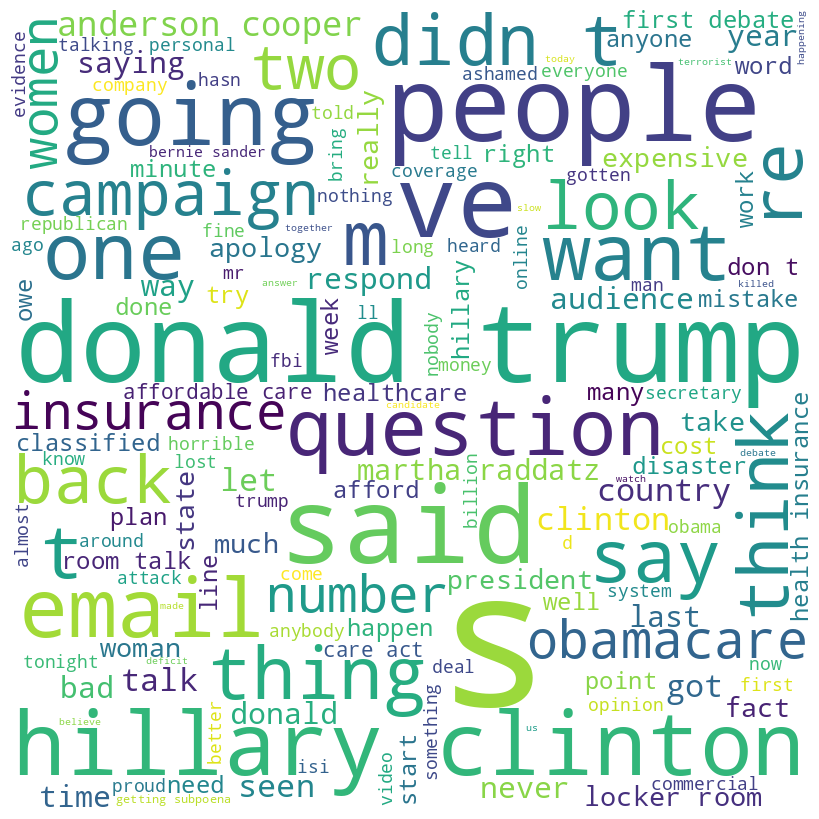

Rank,Word(s),Count
1,people,2847
2,going,2785
3,trump,2445
4,know,2023
5,said,1871
6,great,1810
7,country,1795
8,donald,1721
9,want,1571
10,like,1480


In [ ]:
# word cloud for negative sentiment
perform_analysis(negative)

## **NER (Entity Identification)**

In [2]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, TFAutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-NER")
model = TFAutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForTokenClassification.

All the weights of TFDistilBertForTokenClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForTokenClassification for predictions without further training.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [7]:
df["transcript"][0]

'Martha Raddatz: (00:07)Good evening. I’m Martha Raddatz from ABC News.Anderson Cooper: (00:11)And I’m Anderson Cooper from CNN. We want to welcome you to Washington University in St. Louis for the second presidential debate between Hillary Clinton and Donald Trump, sponsored by the Commission on Presidential Debates. Tonight’s debate is a town hall format, which gives voters a chance to directly ask the candidates questions. Martha and I will ask follow-up questions. But the night really belongs to the people in this room and to people across the country who have submitted questions online.Martha Raddatz: (00:35)The people you see on this stage were chosen by the Gallup organization. They are all from the St. Louis area and told Gallup they haven’t committed to a candidate. Each of them came here with questions they want to ask. And we saw those questions for the first time this morning. Anderson and I and our team from ABC and CNN are the only ones who have seen them.Martha Raddatz: 

In [8]:
all_transcripts = df["transcript"][0]

In [10]:
import re
all_transcripts = all_transcripts.lower()
# removing the time stamps in our transcript

all_transcripts = re.sub(r'\(\d{2}:\d{2}\)', '', all_transcripts)
all_transcripts

'martha raddatz: good evening. i’m martha raddatz from abc news.anderson cooper: and i’m anderson cooper from cnn. we want to welcome you to washington university in st. louis for the second presidential debate between hillary clinton and donald trump, sponsored by the commission on presidential debates. tonight’s debate is a town hall format, which gives voters a chance to directly ask the candidates questions. martha and i will ask follow-up questions. but the night really belongs to the people in this room and to people across the country who have submitted questions online.martha raddatz: the people you see on this stage were chosen by the gallup organization. they are all from the st. louis area and told gallup they haven’t committed to a candidate. each of them came here with questions they want to ask. and we saw those questions for the first time this morning. anderson and i and our team from abc and cnn are the only ones who have seen them.martha raddatz: both candidates will 

In [11]:
# sentences = all_transcripts.split(".")

In [ ]:
# nlp(sentences[1])

In [12]:
import pandas as pd
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample transcript
transcript = all_transcripts

# Perform NER
doc = nlp(transcript)

# Print the entities
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

# Optional: Count entity types
entity_counts = {}
for ent in doc.ents:
    if ent.label_ in entity_counts:
        entity_counts[ent.label_] += 1
    else:
        entity_counts[ent.label_] = 1

print("\nEntity type counts:")
for entity_type, count in entity_counts.items():
    print(f"{entity_type}: {count}")

Entity: martha raddatz, Label: PERSON
Entity: evening, Label: TIME
Entity: martha raddatz, Label: PERSON
Entity: abc news.anderson, Label: ORG
Entity: anderson cooper, Label: PERSON
Entity: cnn, Label: ORG
Entity: washington university, Label: ORG
Entity: second, Label: ORDINAL
Entity: hillary clinton, Label: PERSON
Entity: donald trump, Label: PERSON
Entity: tonight, Label: TIME
Entity: martha, Label: PERSON
Entity: the night, Label: TIME
Entity: gallup, Label: ORG
Entity: gallup, Label: ORG
Entity: first, Label: ORDINAL
Entity: this morning, Label: TIME
Entity: anderson, Label: PERSON
Entity: abc, Label: ORG
Entity: cnn, Label: ORG
Entity: two minutes, Label: TIME
Entity: republican, Label: NORP
Entity: donald j. trump, Label: PERSON
Entity: democratic, Label: NORP
Entity: hillary clinton.hillary clinton, Label: PERSON
Entity: hello.anderson, Label: PERSON
Entity: two minutes, Label: TIME
Entity: clinton, Label: PERSON
Entity: first, Label: ORDINAL
Entity: first, Label: ORDINAL
Entit

In [13]:
from IPython.display import display, HTML
from spacy import displacy
html = displacy.render(doc, style="ent", page=True)

# Display the visualization
display(HTML(html))

<IPython.core.display.HTML object>

/var/folders/k5/rl2z00bx1k762cd48kwsjv6w0000gn/T/ipykernel_36690/3043238226.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Entity', y='Count', data=df_top, palette=custom_palette)


Graph saved as 'top_entities_graph.png'


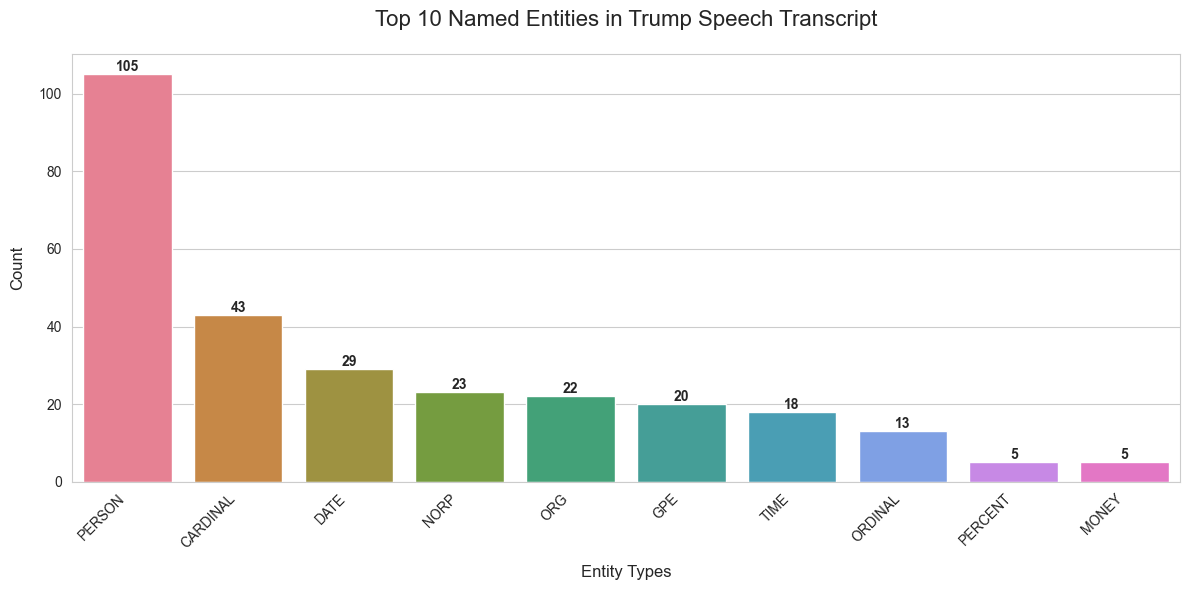

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already performed NER and have entity_counts dictionary

# Convert entity_counts to a DataFrame
df = pd.DataFrame(list(entity_counts.items()), columns=['Entity', 'Count'])

# Sort by Count in descending order and select top N entities
top_n = 10
df_top = df.nlargest(top_n, 'Count')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Set the style
sns.set_style("whitegrid")

# Create a custom color palette
custom_palette = sns.color_palette("husl", n_colors=top_n)

# Create the bar plot using seaborn with custom colors
ax = sns.barplot(x='Entity', y='Count', data=df_top, palette=custom_palette)

# Customize the plot
plt.title(f'Top {top_n} Named Entities in Trump Speech Transcript', fontsize=16, pad=20)
plt.xlabel('Entity Types', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(df_top['Count']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Adjust layout and display
plt.tight_layout()

# Save the plot
plt.savefig('top_entities_graph.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'top_entities_graph.png'")

# Display the plot
plt.show()

In [15]:
# import spacy
# from collections import Counter

# # Load the English language model
# nlp = spacy.load("en_core_web_sm")

# # Sample transcript
# transcript = all_transcripts  # Assuming all_transcripts is already defined

# # Create a mapping for normalization
# entity_mapping = {
#     "clinton": "Hillary Clinton",
#     "hillary clinton": "Hillary Clinton",
#     "hillary": "Hillary Clinton",
#     "trump": "Donald Trump",
#     "donald trump": "Donald Trump",
#     "americans": "American",
#     "american": "American",
#     "republicans": "Republicans",
#     "african-americans": "African-Americans",
# }

# # Perform NER
# doc = nlp(transcript)

# # Dictionaries to hold entity counts
# persons_entity = Counter()
# combined_org_norp_entity = Counter()

# # Count and normalize entities
# for ent in doc.ents:
#     normalized_text = entity_mapping.get(ent.text.lower(), ent.text)
#     if ent.label_ == "PERSON":
#         persons_entity[normalized_text] += 1
#     elif ent.label_ in ["ORG", "NORP"]:
#         combined_org_norp_entity[normalized_text] += 1

# # Get the top 5 entities for each category
# top_5_persons = persons_entity.most_common(5)
# top_5_combined_org_norp = combined_org_norp_entity.most_common(5)

# # Display the results
# print("Top 5 PERSON entities with counts:")
# for person, count in top_5_persons:
#     print(f"{person}: {count}")

# print("\nTop 5 combined ORG and NORP entities with counts:")
# for entity, count in top_5_combined_org_norp:
#     print(f"{entity}: {count}")

Top 5 PERSON entities with counts:
Hillary Clinton: 44
Donald Trump: 12
michelle obama: 3
martha raddatz: 2
anderson cooper: 2

Top 5 combined ORG and NORP entities with counts:
American: 6
Republicans: 3
African-Americans: 3
fbi: 3
cnn: 2


In [16]:
import spacy
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample transcript
transcript = all_transcripts  # Assuming all_transcripts is already defined

# Create a mapping for normalization
entity_mapping = {
    "clinton": "Hillary Clinton",
    "hillary clinton": "Hillary Clinton",
    "hillary": "Hillary Clinton",
    "trump": "Donald Trump",
    "donald trump": "Donald Trump",
    "americans": "American",
    "american": "American",
    "republicans": "Republicans",
    "african-americans": "African-Americans",
}

# Perform NER
doc = nlp(transcript)

# Dictionaries to hold entity counts
persons_entity = Counter()
combined_org_norp_entity = Counter()

# Count and normalize entities
for ent in doc.ents:
    normalized_text = entity_mapping.get(ent.text.lower(), ent.text)
    if ent.label_ == "PERSON":
        persons_entity[normalized_text] += 1
    elif ent.label_ in ["ORG", "NORP"]:
        combined_org_norp_entity[normalized_text] += 1

# Get the top 5 entities for each category
top_5_persons = persons_entity.most_common(5)
top_5_combined_org_norp = combined_org_norp_entity.most_common(5)

# Prepare data for plotting
entities = [person[0] for person in top_5_persons] + [org[0] for org in top_5_combined_org_norp]
person_counts = [person[1] for person in top_5_persons] + [0] * 5
org_norp_counts = [0] * 5 + [org[1] for org in top_5_combined_org_norp]

# Create subplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Add traces for each category
fig.add_trace(
    go.Bar(x=entities, y=person_counts, name="PERSON", marker_color='skyblue'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=entities, y=org_norp_counts, name="ORG/NORP", marker_color='lightgreen'),
    row=1, col=1
)

# Update layout
fig.update_layout(
    title_text="Top 5 Entities Comparison",
    barmode='group',
    yaxis_title="Counts",
    xaxis_title="Entities",
    legend_title="Entity Type",
    font=dict(size=12),
    height=600,
    width=1000
)

# Update x-axis
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

# Print the results (optional)
print("Top 5 PERSON entities with counts:")
for person, count in top_5_persons:
    print(f"{person}: {count}")

print("\nTop 5 combined ORG and NORP entities with counts:")
for entity, count in top_5_combined_org_norp:
    print(f"{entity}: {count}")

Top 5 PERSON entities with counts:
Hillary Clinton: 44
Donald Trump: 12
michelle obama: 3
martha raddatz: 2
anderson cooper: 2

Top 5 combined ORG and NORP entities with counts:
American: 6
Republicans: 3
African-Americans: 3
fbi: 3
cnn: 2


# **Topic Identification**

In [ ]:
def process_topic_identification(transcript):
    import re
    import pandas as pd
    from gensim import corpora
    from gensim.models import LdaMulticore
    from gensim.parsing.preprocessing import STOPWORDS
    from gensim.utils import simple_preprocess
    from collections import Counter

    # Load your dataset
    df = pd.read_pickle("updated_trump_speech_transcripts.pkl")  # Replace with your actual file path

    # Select a single row (e.g., the first row)
    # selected_row = df.iloc[0]

    # Get the transcript from the selected row
    # transcript = selected_row['transcript']
    transcript = re.sub(r'\(\d{2}:\d{2}\)', '', transcript)


    def preprocess(text):
        result = []
        for token in simple_preprocess(text):
            if token not in STOPWORDS and len(token) > 3:
                result.append(token)
        return result

    processed_transcript = preprocess(transcript)

    # Create a dictionary from the words in the transcript
    dictionary = corpora.Dictionary([processed_transcript])

    # Create a corpus
    corpus = [dictionary.doc2bow(processed_transcript)]

    # Train the LDA model
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5,
                            random_state=100, chunksize=100,
                            passes=10, per_word_topics=True)

    print("Top 5 Topics:")
    topics = lda_model.print_topics(num_words=5)
    for topic in topics:
        print(topic)

    print("\nMost Common Words:")
    word_counts = Counter(processed_transcript)
    print(word_counts.most_common(10))

    print("\nTopic Distribution for the Document:")
    doc_topics = lda_model.get_document_topics(corpus[0])
    for topic, probability in sorted(doc_topics, key=lambda x: x[1], reverse=True):
        print(f"Topic {topic}: {probability:.4f}")

In [ ]:
import pandas as pd
df = pd.read_pickle("updated_trump_speech_transcripts.pkl")
process_topic_identification(df["transcript"][4])

Top 5 Topics:
(0, '0.003*"hillary" + 0.003*"know" + 0.003*"tonight" + 0.003*"great" + 0.003*"thank"')
(1, '0.003*"hillary" + 0.003*"know" + 0.003*"thank" + 0.003*"tonight" + 0.003*"true"')
(2, '0.003*"hillary" + 0.003*"know" + 0.003*"thank" + 0.003*"tonight" + 0.003*"great"')
(3, '0.034*"hillary" + 0.023*"know" + 0.014*"thank" + 0.014*"tonight" + 0.013*"great"')
(4, '0.003*"hillary" + 0.003*"know" + 0.003*"tonight" + 0.003*"thank" + 0.003*"great"')

Most Common Words:
[('hillary', 24), ('know', 16), ('thank', 10), ('tonight', 10), ('great', 9), ('true', 8), ('dinner', 7), ('people', 7), ('time', 7), ('want', 5)]

Topic Distribution for the Document:
Topic 3: 0.9987


# **Sentiment Analysis for sentences**

In [ ]:
def process_sentiment_analysis_sentence(transcript):
    import re
    import pandas as pd
    import nltk
    from nltk.sentiment import SentimentIntensityAnalyzer
    from nltk.tokenize import sent_tokenize

    # Download necessary NLTK data
    nltk.download('punkt')
    nltk.download('vader_lexicon')

    # Load your dataset
    df = pd.read_pickle("updated_trump_speech_transcripts.pkl")  # Replace with your actual file path

    # Select a single row (e.g., the first row)
    # selected_row = df.iloc[0]

    # Get the transcript from the selected row
    # transcript = selected_row['transcript']
    transcript = transcript.lower()
    transcript = re.sub(r'\(\d{2}:\d{2}\)', '', transcript)

    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Tokenize the transcript into sentences
    sentences = sent_tokenize(transcript)

    # Perform sentiment analysis on each sentence
    sentiments = []
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        sentiments.append({
            'sentence': sentence,
            'sentiment': sentiment,
            'overall': 'positive' if sentiment['compound'] > 0 else 'negative' if sentiment['compound'] < 0 else 'neutral'
        })

    # Convert the results to a DataFrame for easy viewing
    results_df = pd.DataFrame(sentiments)

    # Print summary statistics
    print("Sentiment Summary:")
    print(results_df['overall'].value_counts(normalize=True))

    # Print the most positive and most negative sentences
    most_positive = results_df.loc[results_df['sentiment'].apply(lambda x: x['compound']).idxmax()]
    most_negative = results_df.loc[results_df['sentiment'].apply(lambda x: x['compound']).idxmin()]

    print("\nMost Positive Sentence:")
    print(most_positive['sentence'])
    print(f"Sentiment: {most_positive['sentiment']}")

    print("\nMost Negative Sentence:")
    print(most_negative['sentence'])
    print(f"Sentiment: {most_negative['sentiment']}")

    # Optional: Save detailed results to a CSV file
    results_df.to_csv("sentiment_analysis_results.csv", index=False)
    print("\nDetailed results saved to 'sentiment_analysis_results.csv'")

In [ ]:
process_sentiment_analysis_sentence(df['transcript'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Summary:
overall
positive    0.419872
neutral     0.304487
negative    0.275641
Name: proportion, dtype: float64

Most Positive Sentence:
and the question for us, the question our country must answer, is that this is not who we are.hillary clinton: that’s why to go back to your question, i want to send a message, we all should, to every boy and girl and indeed to the entire world that america already is great, but we are great because we are good and we will respect one another and we will work with one another and we will celebrate our diversity.
Sentiment: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9732}

Most Negative Sentence:
he never apologized to mr. and mrs. khan, the gold star family whose son, captain kahn died in the line of duty in iraq, and donald insulted and attack them for weeks over their religion.hillary clinton: he never apologized to the distinguished federal judge who was born in indiana.
Sentiment: {'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'comp

# **Overall Sentiment using gpt4o-mini**

In [29]:
import pandas as pd
import json
from openai import OpenAI
import os
from dotenv import load_dotenv
load_dotenv() 

def load_dataset(file_path):
    """Load the dataset from a pkl file."""
    return pd.read_pickle(file_path)

def select_speech(df, index=0):
    """Select a speech from the dataset."""
    return df.iloc[index]['transcript']

def get_sentiment(speech):
    """Perform sentiment analysis using GPT-4o-mini."""
    gpt4o_client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))
    prompt = f"""Analyze the sentiment of the following speech and classify it as either positive, neutral, or negative. Provide your answer in JSON format with a key 'sentiment' and the value as either 'positive', 'neutral', or 'negative'.

Speech: "{speech}"

Classify the overall sentiment:"""

    messages = [{"role": "user", "content": prompt}]
    response = gpt4o_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
        response_format={"type": "json_object"},
    )

    result = json.loads(response.choices[0].message.content)
    return result['sentiment']


In [30]:
# Load the dataset
df = load_dataset('updated_trump_speech_transcripts.pkl')

# Select a speech (change the index to select different speeches)
speech = select_speech(df, index=0)

# Perform sentiment analysis
sentiment = get_sentiment(speech)

print(f"Sentiment: {sentiment}")

Sentiment: neutral


## **Transcript Level Analysis using gpt4o-mini**

In [24]:
def get_response(row_content):
    from openai import OpenAI
    gpt4o_client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))
    messages = [{"role": "user", "content": row_content}]
    response = gpt4o_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0,
        # max_tokens=2500,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
    )
    return response.choices[0].message.content

In [25]:
transcript = df["transcript"][0]
prompt = f""" 
The following is a transcript of a speech given by Donald Trump.
{transcript}
Provide the most important sentences that depicts positive and negative sentiments in the speech.
Try to pick Organizations and Person for the positive and negative sentiments and try to mention regarding who/what he is talking to (only if mentioned).
the format should be like below
sentence: <sentence>
sentiment: <sentiment>
sentiment_score: <sentiment_score>
person/organization: <person/organization> // person or the organization refered in the sentence (only if given, else None)
"""
get_response(prompt)

'Here are some important sentences from the speech that depict positive and negative sentiments, along with their sentiment scores and references to persons or organizations:\n\n1. sentence: "I have a very positive and optimistic view about what we can do together."\n   sentiment: Positive\n   sentiment_score: 0.8\n   person/organization: Hillary Clinton\n\n2. sentence: "This is a great country. This is a great land."\n   sentiment: Positive\n   sentiment_score: 0.9\n   person/organization: None\n\n3. sentence: "Obamacare is a disaster."\n   sentiment: Negative\n   sentiment_score: -0.9\n   person/organization: None\n\n4. sentence: "I will knock the hell out of ISIS."\n   sentiment: Positive\n   sentiment_score: 0.85\n   person/organization: None\n\n5. sentence: "Hillary has done a terrible job for the African-Americans."\n   sentiment: Negative\n   sentiment_score: -0.8\n   person/organization: Hillary Clinton\n\n6. sentence: "I want to be the president for all Americans."\n   sentime

## **Setiment Analysis for sentences using gpt4o-mini**

In [21]:
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from openai import OpenAI
import os
import json

# Download necessary NLTK data
nltk.download('punkt', quiet=True)

def get_sentiment(sentence, client):
    """Perform sentiment analysis using GPT-4o-mini."""
    prompt = f"""Analyze the sentiment of the following sentence and classify it as either positive, neutral, or negative. Provide your answer in JSON format with keys 'sentiment' (string) and 'compound' (float between -1 and 1).

Sentence: "{sentence}"

Classify the sentiment:"""

    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
        response_format={"type": "json_object"},
    )
    
    result = json.loads(response.choices[0].message.content)
    return result

def process_sentiment_analysis_sentence(transcript, transcript_number):
    # Get the API key from environment variables
    api_key = os.environ.get("OPENAI_API_KEY")
    
    if not api_key:
        raise ValueError("API key not found. Please set the OPENAI_API_KEY environment variable.")
    
    gpt4o_client = OpenAI(api_key=api_key)

    # Preprocess the transcript
    transcript = transcript.lower()
    transcript = re.sub(r'\(\d{2}:\d{2}\)', '', transcript)

    # Tokenize the transcript into sentences
    sentences = sent_tokenize(transcript)

    # Perform sentiment analysis on each sentence
    sentiments = []
    for sentence in sentences:
        sentiment = get_sentiment(sentence, gpt4o_client)
        sentiments.append({
            'sentence': sentence,
            'sentiment': sentiment,
            'overall': sentiment['sentiment']
        })

    # Convert the results to a DataFrame for easy viewing
    results_df = pd.DataFrame(sentiments)

    # Print summary statistics
    print(f"Sentiment Summary for Transcript {transcript_number}:")
    print(results_df['overall'].value_counts(normalize=True))

    # Print the most positive and most negative sentences
    most_positive = results_df.loc[results_df['sentiment'].apply(lambda x: x['compound']).idxmax()]
    most_negative = results_df.loc[results_df['sentiment'].apply(lambda x: x['compound']).idxmin()]

    print("\nMost Positive Sentence:")
    print(most_positive['sentence'])
    print(f"Sentiment: {most_positive['sentiment']}")

    print("\nMost Negative Sentence:")
    print(most_negative['sentence'])
    print(f"Sentiment: {most_negative['sentiment']}")

    # Save detailed results to a CSV file with transcript number in the filename
    filename = f"sentiment_analysis_results_gpt4_transcript{transcript_number}.csv"
    results_df.to_csv(filename, index=False)
    print(f"\nDetailed results saved to '{filename}'")

In [ ]:
# # For all transcripts
# df = pd.read_pickle("updated_trump_speech_transcripts.pkl")  # Replace with your actual file path
    
# for index, row in df.iterrows():
#     transcript = row['transcript']
#     transcript_number = index + 1  # Assuming the index starts at 0
#     print(f"\nProcessing Transcript {transcript_number}")
#     process_sentiment_analysis_sentence(transcript, transcript_number)

In [23]:
df = pd.read_pickle("updated_trump_speech_transcripts.pkl")  
    
# Get user input for transcript selection
while True:
    try:
        transcript_index = int(input("Enter the transcript index you want to analyze (0-111): "))
        if 0 <= transcript_index <= 111:
            break
        else:
            print("Please enter a number between 0 and 111.")
    except ValueError:
        print("Please enter a valid number.")

# Select the specified transcript
selected_transcript = df.iloc[transcript_index]['transcript']

# Process the selected transcript
print(f"\nProcessing Transcript Index {transcript_index}")
process_sentiment_analysis_sentence(selected_transcript, transcript_index)


Processing Transcript Index 0
Sentiment Summary for Transcript 0:
overall
neutral     0.426282
negative    0.375000
positive    0.198718
Name: proportion, dtype: float64

Most Positive Sentence:
it’s amazing.
Sentiment: {'sentiment': 'positive', 'compound': 0.765}

Most Negative Sentence:
you bragged that you have sexually assaulted women.
Sentiment: {'sentiment': 'negative', 'compound': -0.9}

Detailed results saved to 'sentiment_analysis_results_gpt4_transcript0.csv'


## **Sentence level Sentiment Analysis with Cummulative Approach using gpt4o-mini**

In [32]:
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from openai import OpenAI
import os
import json

# Download necessary NLTK data
nltk.download('punkt', quiet=True)

def get_sentiment(text, client):
    """Perform sentiment analysis using GPT-4o-mini."""
    prompt = f"""Analyze the sentiment of the following text and classify it as either positive, neutral, or negative. Provide your answer in JSON format with keys 'sentiment' (string) and 'compound' (float between -1 and 1).

Text: "{text}"

Classify the sentiment:"""

    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
        response_format={"type": "json_object"},
    )
    
    result = json.loads(response.choices[0].message.content)
    return result

def process_cumulative_sentiment_analysis(transcript, transcript_index):
    # Get the API key from environment variables
    api_key = os.environ.get("OPENAI_API_KEY")
    
    if not api_key:
        raise ValueError("API key not found. Please set the OPENAI_API_KEY environment variable.")
    
    gpt4o_client = OpenAI(api_key=api_key)

    # Preprocess the transcript
    transcript = transcript.lower()
    transcript = re.sub(r'\(\d{2}:\d{2}\)', '', transcript)

    # Tokenize the transcript into sentences
    sentences = sent_tokenize(transcript)

    # Perform cumulative sentiment analysis
    sentiments = []
    cumulative_text = ""
    for i, sentence in enumerate(sentences):
        cumulative_text += " " + sentence if cumulative_text else sentence
        sentiment = get_sentiment(cumulative_text, gpt4o_client)
        sentiments.append({
            'sentence_index': i,
            'cumulative_text': cumulative_text,
            'sentiment': sentiment['sentiment'],
            'compound': sentiment['compound']
        })

    # Convert the results to a DataFrame for easy viewing
    results_df = pd.DataFrame(sentiments)

    # Print summary statistics
    print(f"Cumulative Sentiment Summary for Transcript Index {transcript_index}:")
    print(results_df['sentiment'].value_counts(normalize=True))

    # Print the most positive and most negative cumulative sentiments
    most_positive = results_df.loc[results_df['compound'].idxmax()]
    most_negative = results_df.loc[results_df['compound'].idxmin()]

    print("\nMost Positive Cumulative Sentiment:")
    print(f"Sentence Index: {most_positive['sentence_index']}")
    print(f"Sentiment: {most_positive['sentiment']} (Compound: {most_positive['compound']})")

    print("\nMost Negative Cumulative Sentiment:")
    print(f"Sentence Index: {most_negative['sentence_index']}")
    print(f"Sentiment: {most_negative['sentiment']} (Compound: {most_negative['compound']})")

    # Save detailed results to a CSV file
    filename = f"cumulative_sentiment_analysis_results_gpt4_transcript{transcript_index}.csv"
    results_df.to_csv(filename, index=False)
    print(f"\nDetailed results saved to '{filename}'")


In [33]:
df = pd.read_pickle("updated_trump_speech_transcripts.pkl")  # Replace with your actual file path
    
# Get user input for transcript selection
while True:
    try:
        transcript_index = int(input("Enter the transcript index you want to analyze (0-111): "))
        if 0 <= transcript_index <= 111:
            break
        else:
            print("Please enter a number between 0 and 111.")
    except ValueError:
        print("Please enter a valid number.")

# Select the specified transcript
selected_transcript = df.iloc[transcript_index]['transcript']

# Process the selected transcript with cumulative sentiment analysis
print(f"\nProcessing Transcript Index {transcript_index} with Cumulative Sentiment Analysis")
process_cumulative_sentiment_analysis(selected_transcript, transcript_index)


Processing Transcript Index 2 with Cumulative Sentiment Analysis
Cumulative Sentiment Summary for Transcript Index 2:
sentiment
positive    0.981481
neutral     0.018519
Name: proportion, dtype: float64

Most Positive Cumulative Sentiment:
Sentence Index: 49
Sentiment: positive (Compound: 0.9998)

Most Negative Cumulative Sentiment:
Sentence Index: 3
Sentiment: neutral (Compound: 0.0)

Detailed results saved to 'cumulative_sentiment_analysis_results_gpt4_transcript2.csv'
